# 用户指南，第10章：示例1
[原文链接](https://web.mit.edu/music21/doc/usersGuide/usersGuide_10_examples1.html#usersguide-10-examples1)

TODO

In [1]:
from music21 import *
s = corpus.parse('bwv66.6')

In [2]:
sChords = s.chordify()
sChords

<music21.stream.Part Soprano>

In [3]:
sFlat = sChords.flatten()
sFlat

<music21.stream.Part Soprano_flat>

In [4]:
sOnlyChords = sFlat.getElementsByClass('Chord')
sOnlyChords

<music21.stream.iterator.StreamIterator for Part:Soprano_flat @:0>

In [5]:
displayPart = stream.Part(id='displayPart')
displayPart

<music21.stream.Part displayPart>

In [6]:
for i in range(0, len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    # do something with thisChord and nextChord here

In [7]:
for n in range(5):
    print(n)

0
1
2
3
4


In [8]:
def appendChordPairs(thisChord, nextChord):
    if ((thisChord.isTriad() is True or
            thisChord.isSeventh() is True) and
                thisChord.root().name == 'A'):
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)

        m = stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)

In [9]:
for i in range(len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    appendChordPairs(thisChord, nextChord)

In [10]:
len(displayPart)

7

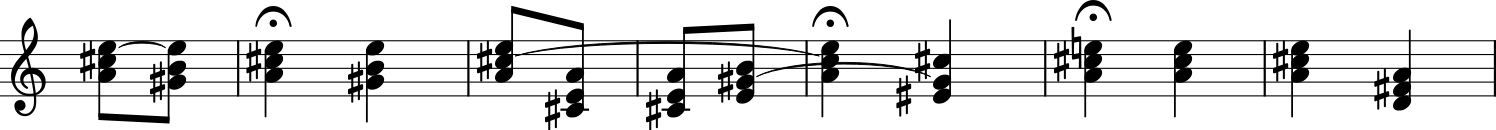

In [11]:
displayPart.show()

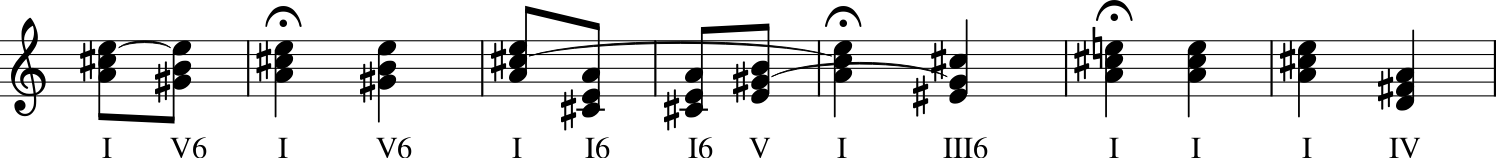

In [12]:
keyA = key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, keyA)
    c.addLyric(str(rn.figure))

displayPart.show()

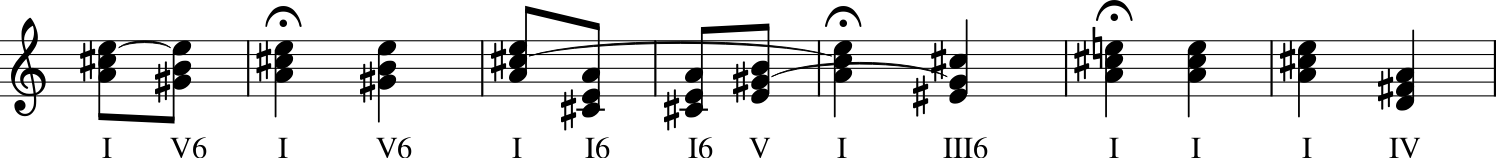

In [13]:
for c in displayPart.recurse().getElementsByClass('Chord'):
    if c.lyric == 'III6':
        c.color = 'pink'
        for x in c.derivation.chain():
            x.color = 'pink'

displayPart.show()

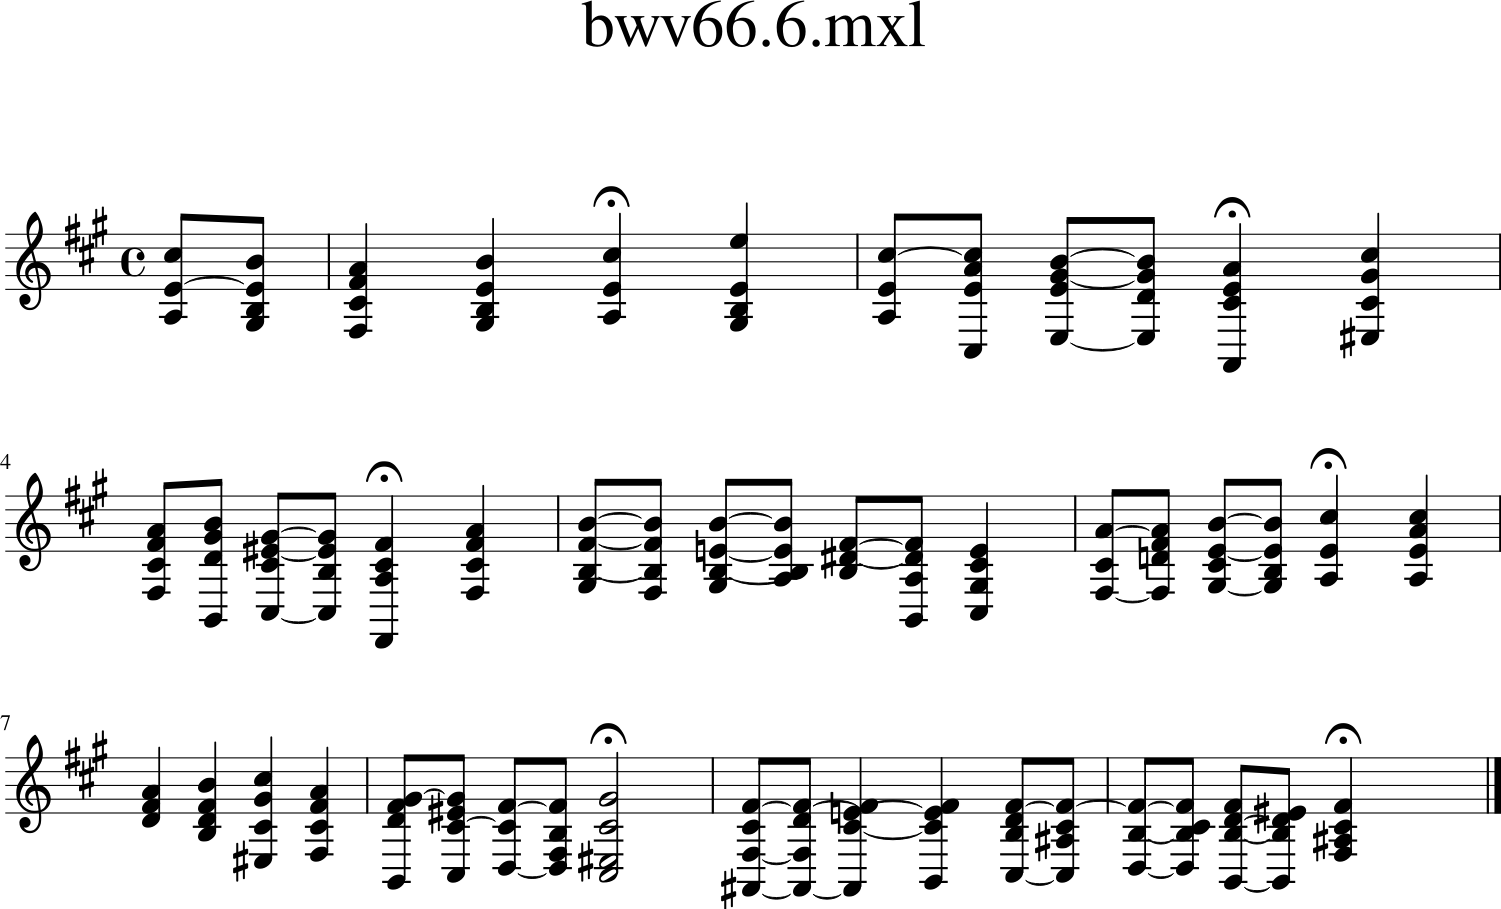

In [14]:
sChords.show()

In [15]:
for m in sChords.getElementsByClass('Measure'):
    k = m.analyze('key')
    print(m.number, k)

0 E major
1 E major
2 A major
3 f# minor
4 E major
5 A major
6 f# minor
7 C# major
8 F# major
9 b minor
